#  Question 0

##  Pandas .interpolate() method

* Method *interpolate* is very useful to fill NaN values.
* By default, NaN values can be filled by other values with the same index for different methods.
* Please note that NaN values in DataFrame/Series with MultiIndex can be filled by 'linear' method as
<code>method = 'linear' </code>. 

In [163]:
import pandas as pd
import numpy as np
a = pd.DataFrame({'a' : [1, 2, np.nan, 5], 'b' : [4, np.nan, 6, 8]})
a.interpolate(method = 'linear')

,a,b
0,1.0,4.0
1,2.0,5.0
2,3.5,6.0
3,5.0,8.0


### Parameters in .interpolate()
##### *parameter **'method'** : *str*, default *'linear'


* Most commonly used methods:
    * 1. **'linear'** : linear regression mind to fit the missing ones.
    * 2. **'pad', 'limit'** :  Fill in NaNs using existing values. Note:Interpolation through padding means copying the value just before a missing entry.While using padding interpolation, you need to specify a limit. The limit is the maximum number of nans the method can fill consecutively.
    * 3. **'polynomial', 'order'** : Polynomial regression mind with a set order to fit the missing ones. Note : NaN of the first column remains, because there is no entry before it to use for interpolation.

In [164]:
m =  pd.Series([0, 1, np.nan, np.nan, 3, 5, 8])
m.interpolate(method = 'pad', limit = 2)

0    0.0
1    1.0
2    1.0
3    1.0
4    3.0
5    5.0
6    8.0
dtype: float64

In [165]:
n = pd.Series([10, 2, np.nan, 4, np.nan, 3, 2, 6]) 
n.interpolate(method = 'polynomial', order = 2)

0    10.000000
1     2.000000
2     1.634259
3     4.000000
4     4.194444
5     3.000000
6     2.000000
7     6.000000
dtype: float64

##### parameter **'axis'** :  default *None*
* 1. axis = 0 : Axis to interpolate along is index.
* 2. axis = 1 : Axis to interpolate along is column.
    

In [166]:
k = pd.DataFrame({'a' : [1, 2, np.nan, 5], 'b' : [4, np.nan, 6, 8]})
k.interpolate(method = 'linear', axis = 0)
k.interpolate(method = 'linear', axis = 1)

,a,b
0,1.0,4.0
1,2.0,2.0
2,NaN,6.0
3,5.0,8.0


###  Returns
* Series or DataFrame or None
* Returns the same object type as the caller, interpolated at some or all NaN values or None if `inplace=True`.

In [1]:
# Question 1
## (a)
# From expression of question, we can see dataset of question 3(a) hw2 is demographic data and
# dataset of question 3(b) is oral health data.

# import demographic and oral health dataset
import numpy as np
import pickle
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from IPython.core.display import display, HTML
# demography data
demogr = pickle.load(open('./demogr_total.pkl','rb'))
# oral health data
orl_halh = pickle.load(open('./oral_dentition_total.pkl','rb')) 

In [2]:
# add gender variable 'RIAGENDR' into data
demogr_11_12 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/DEMO_G.XPT')
demogr_13_14 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.XPT')
demogr_15_16 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT')
demogr_17_18 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.XPT')

In [3]:
deg_12_gen = demogr_11_12[['SEQN', 'RIAGENDR']]
deg_34_gen = demogr_13_14[['SEQN', 'RIAGENDR']]
deg_56_gen = demogr_15_16[['SEQN', 'RIAGENDR']]
deg_78_gen = demogr_17_18[['SEQN', 'RIAGENDR']]
deg_gen = pd.concat([deg_12_gen, deg_34_gen, deg_56_gen, deg_78_gen])
deg_gen = deg_gen.rename(columns = {'SEQN' : 'id'})
deg_gen = deg_gen.astype({'id' : 'str'})

In [6]:
demogr_add = pd.merge(demogr, deg_gen, on = 'id')
# change variable name of 'RIAGENDR' as gender
demogr_add = demogr_add.rename(columns = {'RIAGENDR' : 'gender'})
demogr_add.head()

,id,age,race,education,marital Status,examine status,masked pseudo-psu,masked pseudo-stratum,interview & mec,interview,type,gender
0,62161.0,22.0,3.0,3.0,5.0,2.0,1.0,91.0,104236.582554,102641.406474,11-12,1.0
1,62162.0,3.0,1.0,NaN,NaN,2.0,3.0,92.0,16116.354010,15457.736897,11-12,2.0
2,62163.0,14.0,6.0,NaN,NaN,2.0,3.0,90.0,7869.485117,7397.684828,11-12,1.0
3,62164.0,44.0,3.0,4.0,1.0,2.0,1.0,94.0,127965.226204,127351.373299,11-12,2.0
4,62165.0,14.0,4.0,NaN,NaN,2.0,2.0,90.0,13384.042162,12209.744980,11-12,2.0


In [7]:
## (b)
# In data oral health(orl_halh), variable 'OHDDESTS' is named 'status code'
oral_OHD = orl_halh[['id', 'status code']]
demogr_comb = pd.merge(demogr_add, oral_OHD, on = 'id', how = 'left')
demogr_comb.shape

(39156, 13)

In [8]:
new_data = pd.merge(demogr_comb, orl_halh, on = 'id', how = 'left')
new_data = new_data[['id', 'gender', 'age', 'examine status', 'status code_y','education']]

# variable 'id','gender','age' has been created.
# create variable'under_20
new_data['under_20'] = 0
new_data.loc[new_data['age'] < 20, 'under_20'] = 1 

# create variable college
## After checking, all ages for individuals when education category is '4' or '5' are above 20 years old,
## so people with education category 4 or 5 are all college ones. Then I put the rest of people into no college group.
new_data.loc[new_data['education'].isin([4, 5]), 'age'].unique()
new_data['college'] = 'No college/<20'
new_data.loc[new_data['education'].isin([4, 5]), 'college']  = 'some college/college graduate'

# careate variable exam status and ohx_status
# 'exam status' in demogr_comb means RIDSTATR and 'status code_y' means OHDDESTS.
new_data = new_data.rename(columns = {'examine status' : 'exam_status', 'status code_y' : 'ohx_status'})

# create variable ohx
new_data['ohx'] = 'missing'
new_data.loc[(new_data['exam_status'] == 2) & (new_data['ohx_status'] == 1), 'ohx'] = 'complete'

In [9]:
## (c)
ori_num = new_data.shape[0]
new_data_r = new_data.loc[new_data['exam_status'].astype('int') == 2, ]
remove_n = ori_num - new_data_r.shape[0]
print('%s number of objects are removed'% remove_n)
remain_n = new_data_r.shape[0]
print('%s number of objects are remained'% remain_n)

1757 number of objects are removed
37399 number of objects are remained


In [10]:
## (d)
agecomp = new_data_r.loc[new_data_r['ohx'] == 'complete', 'age']
agemiss = new_data_r.loc[new_data_r['ohx'] == 'missing', 'age']
agemean_comp = np.mean(agecomp)
agemean_miss = np.mean(agemiss)
agesd_comp = np.sqrt(np.var(agecomp))
agesd_miss = np.sqrt(np.var(agemiss))

comp_under_0 = new_data_r.loc[(new_data_r['under_20'] == 0) & (new_data_r['ohx'] == 'complete'),].shape[0]
miss_under_0 = new_data_r.loc[(new_data_r['under_20'] == 0) & (new_data_r['ohx'] == 'missing'),].shape[0]
pro_comp_u0 = (comp_under_0 / (comp_under_0 + miss_under_0))
pro_miss_u0 = (miss_under_0 / (comp_under_0 + miss_under_0))

comp_under_1 = new_data_r.loc[(new_data_r['under_20'] == 1) & (new_data_r['ohx'] == 'complete'),].shape[0]
miss_under_1 = new_data_r.loc[(new_data_r['under_20'] == 1) & (new_data_r['ohx'] == 'missing'),].shape[0]
pro_comp_u1 = (comp_under_1 / (comp_under_1 + miss_under_1))
pro_miss_u1 = (miss_under_1 / (comp_under_1 + miss_under_1))

comp_gender_male = new_data_r.loc[(new_data_r['gender'] == 1) & (new_data_r['ohx'] == 'complete'),].shape[0]
miss_gender_male = new_data_r.loc[(new_data_r['gender'] == 1) & (new_data_r['ohx'] == 'missing'),].shape[0]
pro_comp_gm = (comp_gender_male / (comp_gender_male + miss_gender_male))
pro_miss_gm = (miss_gender_male / (comp_gender_male + miss_gender_male))

comp_gender_female = new_data_r.loc[(new_data_r['gender'] == 2) & (new_data_r['ohx'] == 'complete'),].shape[0]
miss_gender_female = new_data_r.loc[(new_data_r['gender'] == 2) & (new_data_r['ohx'] == 'missing'),].shape[0]
pro_comp_gf = (comp_gender_female / (comp_gender_female + miss_gender_female))
pro_miss_gf = (miss_gender_female / (comp_gender_female + miss_gender_female))

comp_college_yes = new_data_r.loc[(new_data_r['college'] == 'some college/college graduate') & \
                                        (new_data_r['ohx'] == 'complete'),].shape[0]
miss_college_yes = new_data_r.loc[(new_data_r['college'] ==  'some college/college graduate') & \
                                        (new_data_r['ohx'] == 'missing'),].shape[0]
pro_comp_cy = (comp_college_yes / (comp_college_yes + miss_college_yes))
pro_miss_cy = (miss_college_yes / (comp_college_yes + miss_college_yes))

comp_college_no = new_data_r.loc[(new_data_r['college'] == 'No college/<20') & \
                                        (new_data_r['ohx'] == 'complete'),].shape[0]
miss_college_no = new_data_r.loc[(new_data_r['college'] ==  'No college/<20') & \
                                        (new_data_r['ohx'] == 'missing'),].shape[0]
pro_comp_cn = (comp_college_no / (comp_college_no + miss_college_no))
pro_miss_cn = (miss_college_no / (comp_college_no + miss_college_no))

In [24]:
# chi-square categorical test 
under_arr = np.array([[comp_under_0, miss_under_0],[comp_under_1, miss_under_1]])
if chi2_contingency(under_arr)[1] < 0.0001:
     u_20_p = '<0.0001'
else:
     u_20_p = '%.4f'%chi2_contingency(under_arr)[1]
print('under_20 p-value:', u_20_p)
gender_arr = np.array([[comp_gender_male, miss_gender_male],[comp_gender_female, miss_gender_female]])
if chi2_contingency(gender_arr)[1] < 0.0001:
     gen_p = '<0.0001'
else:
     gen_p = '%.4f'%chi2_contingency(gender_arr)[1]
print('gender p-value:', gen_p)
college_arr = np.array([[comp_college_yes, miss_college_yes],[comp_college_no, miss_college_no]])
if chi2_contingency(college_arr)[1] < 0.0001:
     college_p = '<0.0001'
else:
     college_p = '%.4f'%chi2_contingency(college_arr)[1]

print('college p-value:', college_p)

under_20 p-value: <0.0001
gender p-value: 0.0014
college p-value: <0.0001


In [25]:
# t test for age
comp_age = new_data_r.loc[new_data_r['ohx'] == 'complete', 'age']
miss_age = new_data_r.loc[new_data_r['ohx'] == 'missing', 'age']
if ttest_ind(comp_age, miss_age)[1] < 0.0001:
     p_value_t = '<0.0001'
else:
     p_value_t = '%.4f'%ttest_ind(comp_age, miss_age)[1]

In [26]:
conc = pd.DataFrame()
conc['name'] = ['age', 'age < 20', 'age < 20', 'gender', 'gender', 'have college', 'have college', \
                'age', 'age < 20', 'age < 20', 'gender', 'gender', 'have college', 'have college']
conc['class'] = [' ', 'True', 'False', 'male', 'female', 'yes', 'no', ' ', 'True', 'False', 'male',\
                 'female', 'yes', 'no']
conc['ohx'] = ['complete', 'complete', 'complete', 'complete', 'complete', 'complete', 'complete', \
               'missing', 'missing', 'missing', 'missing', 'missing', 'missing', 'missing']
conc['info'] = ['%.4f(%.2f)'%(agemean_comp, agesd_comp), '%s(%.2f%%)'%(comp_under_1, 100 * pro_comp_u1),\
                '%s(%.2f%%)'%(comp_under_0, 100 * pro_comp_u0), '%s(%.2f%%)'%(comp_gender_male, 100 * pro_comp_gm),\
                '%s(%.2f%%)'%(comp_gender_female, 100 * pro_comp_gf), '%s(%.2f%%)'%(comp_college_yes, 100 * pro_comp_cy),\
                '%s(%.2f%%)'%(comp_college_no, 100 * pro_comp_cn),\
                '%.4f(%.2f)'%(agemean_miss,agesd_miss), '%s(%.2f%%)'%(miss_under_1, 100 * pro_miss_u1),\
                '%s(%.2f%%)'%(miss_under_0, 100 * pro_miss_u0), '%s(%.2f%%)'%(miss_gender_male, 100 * pro_miss_gm),\
                '%s(%.2f%%)'%(miss_gender_female, 100 * pro_miss_gf), '%s(%.2f%%)'%(miss_college_yes, 100 * pro_miss_cy),\
                '%s(%.2f%%)'%(miss_college_no, 100 * pro_miss_cn)]
conc['p value'] = ['%s(t test)'%p_value_t, '%s(chi-square test)'%u_20_p, '%s(chi-square test)'%u_20_p,\
                  '%s(chi-square test)'%gen_p, '%s(chi-square test)'%gen_p, '%s(chi-square test)'%college_p,\
                  '%s(chi-square test)'%college_p,
                  '%s(t test)'%p_value_t, '%s(chi-square test)'%u_20_p, '%s(chi-square test)'%u_20_p,\
                  '%s(chi-square test)'%gen_p, '%s(chi-square test)'%gen_p, '%s(chi-square test)'%college_p,\
                  '%s(chi-square test)'%college_p]
new_d = conc.pivot(index = ['name', 'p value', 'class'], columns = 'ohx', values = ['info'])

In [27]:
display(new_d)

info                
ohx                                                 complete         missing
name         p value                  class                                 
age          <0.0001(t test)                  33.1695(24.37)  22.0095(26.58)
age < 20     <0.0001(chi-square test) False    20369(94.10%)     1277(5.90%)
                                      True     13991(88.81%)    1762(11.19%)
gender       0.0014(chi-square test)  female   17342(91.43%)     1626(8.57%)
                                      male     17018(92.33%)     1413(7.67%)
have college <0.0001(chi-square test) no       22974(90.45%)     2427(9.55%)
                                      yes      11386(94.90%)      612(5.10%)

In [125]:
# Question 2

## (a)(b)
"""
## 2(a)
  I build the confidence interval function from problem set 1, 3(a) and 3(b). 
  Function of 3(a) is named 'normal_estimate',which is used to calculate the standard point and interval estimate for 
the population mean based on Normal theory taking the form x_hat±z×se(x_hat) where x_hat is the mean, se(x) is the 
standard error, and z is a Gaussian multiplier that depends on the desired confidence level. 
  Fuction of 3(b) is named 'proportion_normal_CI', which computes a confidence interval for a population proportion 
arising from a Binomial experiment with following methods: 'Normal approximation', 'Clopper-Pearson interval', 
'Jeffrey’s interval' and 'Agresti-Coull interval'.
  I put these two functions in confinterval.py document which is referred in this question.
---------
Function head : 
(1) normal_estimate: 'normal_estimate(data_array,c_level, CI_format = "{est}[{level}% CI: ({lwr}, {upr})]") '
(2) proportion_normal_CI: 'proportion_normal_CI(data_array, c_level, method, CI_format = "{est}[{level}% CI: ({lwr}, {upr})]")'   
  'Nor','Clo','Jef','Agr'.These 4 values represent Normal approximation, Clopper-Pearson,Jeffrey's and Agresti-Coull interval 
respectively.

## 2(b)
  To save time, I keep questions of (a) and (b) solved simultaneously in monto carlo process below. 
""" 
from confinterval import normal_estimate
from confinterval import proportion_normal_CI
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [133]:
n = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
p = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# calculate replicate number of monto carlo under different confidence levels
# use margin of error formula : Z*sqrt(p*(1-p)/n), Z is cummulative value of normal distribution under nominal confidence level.
# Since Z*sqrt(p(1-p)/n)<=0.005, then n>=40000*p*(1-p)*Z^2.
# I set binomial confidence level : 95%. After calculation, monto carlo estimate time must be more than 7299.
# So value n_replicate as 7299.

Z_95 = scipy.stats.norm.ppf(0.95 + 0.05/2)
n_95 = np.ceil(pow(Z_95, 2) * 0.95 * 0.05 * 40000)
n_replicate = int(n_95) # 7299

northe_r = np.zeros([len(n) * len(p), 3]) # contain result of the question
norappr_r = np.zeros([len(n) * len(p), 3])
clopear_r = np.zeros([len(n) * len(p), 3])
jef_r = np.zeros([len(n) * len(p), 3])
agr_r = np.zeros([len(n) * len(p), 3])

northe_wid = np.zeros([len(n) * len(p), 3]) # contain result of the question
norappr_wid = np.zeros([len(n) * len(p), 3])
clopear_wid = np.zeros([len(n) * len(p), 3])
jef_wid = np.zeros([len(n) * len(p), 3])
agr_wid = np.zeros([len(n) * len(p), 3])
c_loop = 0

for i in n:
    for j in p:
        # generate count variables to get the achieved confidence interval during monto carlo. 
        n_nor_the = 0
        n_nor_appr = 0
        n_clo_pear = 0
        n_jef = 0
        n_agr = 0
        
        wid_nor_the = 0
        wid_nor_appr = 0
        wid_clo_pear = 0
        wid_jef = 0
        wid_agr = 0
        
        for nn in range(n_replicate): #
            data_array = np.random.binomial(1, j, i)
            # output dictionary for these CI's
            nor_then = normal_estimate(data_array, 95, None) 
            nor_appr = proportion_normal_CI(data_array, 95, 'Nor', None)
            clo_pear = proportion_normal_CI(data_array, 95, 'Clo', None)
            jef = proportion_normal_CI(data_array, 95, 'Jef', None)
            agr = proportion_normal_CI(data_array, 95, 'Agr', None)
            
            wid_nor_the += nor_then['upr'] - nor_then['lwr']
            wid_nor_appr += nor_appr['upr'] - nor_appr['lwr']
            wid_clo_pear += clo_pear['upr'] - clo_pear['lwr']
            wid_jef += jef['upr'] - jef['lwr']
            wid_agr += agr['upr'] - agr['lwr']
            
            if (j >= nor_then['lwr']) & (j <= nor_then['upr']) :
                n_nor_the = n_nor_the + 1
            if (j >= nor_appr['lwr']) & (j <= nor_appr['upr']) :
                n_nor_appr = n_nor_appr + 1
            if (j >= clo_pear['lwr']) & (j <= clo_pear['upr']) :
                n_clo_pear = n_clo_pear + 1            
            if (j >= jef['lwr']) & (j <= jef['upr']) :
                n_jef = n_jef + 1  
            if (j >= agr['lwr']) & (j <= agr['upr']) :
                n_agr = n_agr + 1
                
        p_northe = '%.3f'%(n_nor_the / n_replicate)
        p_norappr = '%.3f'%(n_nor_appr / n_replicate)
        p_clopear = '%.3f'%(n_clo_pear / n_replicate)
        p_jef = '%.3f'%(n_jef / n_replicate)
        p_agr = '%.3f'%(n_agr / n_replicate)
        
        awid_northe = '%.3f'%(wid_nor_the / n_replicate)
        awid_norappr = '%.3f'%(wid_nor_appr / n_replicate)
        awid_clopear = '%.3f'%(wid_clo_pear / n_replicate)
        awid_jef = '%.3f'%(wid_jef / n_replicate)
        awid_agr = '%.3f'%(wid_agr / n_replicate)
        
        northe_r[c_loop] = [i, j, p_northe] # contain achieved confidence level
        norappr_r[c_loop] = [i, j, p_norappr]
        clopear_r[c_loop] = [i, j, p_clopear]
        jef_r[c_loop] = [i, j, p_jef]
        agr_r[c_loop] = [i, j, p_agr]
        
        northe_wid[c_loop] = [i, j, awid_northe] # contain average confidence interval width
        norappr_wid[c_loop] = [i, j, awid_norappr]
        clopear_wid[c_loop] = [i, j, awid_clopear]
        jef_wid[c_loop] = [i, j, awid_jef]
        agr_wid[c_loop] = [i, j, awid_agr]
        
        c_loop = c_loop + 1

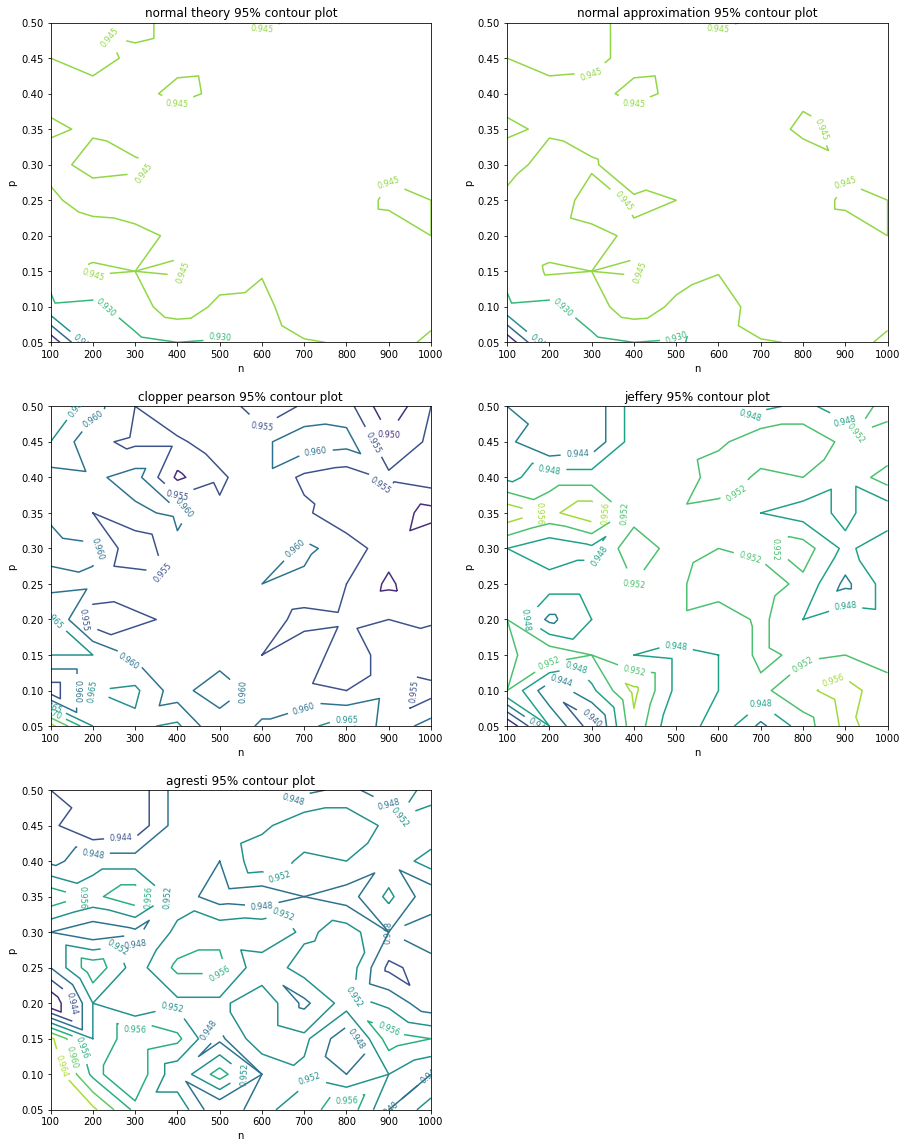

In [135]:
## (a) contour plots of achieved confidence level 

plt.rcParams["figure.figsize"] = (15, 20)
## northe
x_nort = northe_r[:, 0]
y_nort = northe_r[:, 1]
z_nort = northe_r[:, 2]
ax0 = plt.subplot(3, 2, 1)
cp = ax0.tricontour(x_nort, y_nort, z_nort)
ax0.clabel(cp, inline = True, fontsize = 8)
ax0.set_title('normal theory 95% contour plot')
ax0.set_xlabel('n')
ax0.set_ylabel('p')

## norappr
x_nora = norappr_r[:, 0]
y_nora = norappr_r[:, 1]
z_nora = norappr_r[:, 2]
ax1 = plt.subplot(3, 2, 2)
cp = ax1.tricontour(x_nora, y_nora, z_nora)
ax1.clabel(cp, inline = True, fontsize = 8)
ax1.set_title('normal approximation 95% contour plot')
ax1.set_xlabel('n')
ax1.set_ylabel('p')

## clopear
x_clo = clopear_r[:, 0]
y_clo = clopear_r[:, 1]
z_clo = clopear_r[:, 2]
ax2 = plt.subplot(3, 2, 3)
cp = ax2.tricontour(x_clo, y_clo, z_clo)
ax2.clabel(cp, inline = True, fontsize = 8)
ax2.set_title('clopper pearson 95% contour plot')
ax2.set_xlabel('n')
ax2.set_ylabel('p')

## jef
x_jef = jef_r[:, 0]
y_jef = jef_r[:, 1]
z_jef = jef_r[:, 2]
ax3 = plt.subplot(3, 2, 4)
cp = ax3.tricontour(x_jef, y_jef, z_jef)
ax3.clabel(cp, inline = True, fontsize = 8)
ax3.set_title('jeffery 95% contour plot')
ax3.set_xlabel('n')
ax3.set_ylabel('p')

## Agr
x_agr = agr_r[:, 0]
y_agr = agr_r[:, 1]
z_agr = agr_r[:, 2]
ax4 = plt.subplot(3, 2, 5)
cp = ax4.tricontour(x_agr, y_agr, z_agr)
ax4.clabel(cp, inline = True, fontsize = 8)
ax4.set_title('agresti 95% contour plot')
ax4.set_xlabel('n')
ax4.set_ylabel('p')

plt.show()

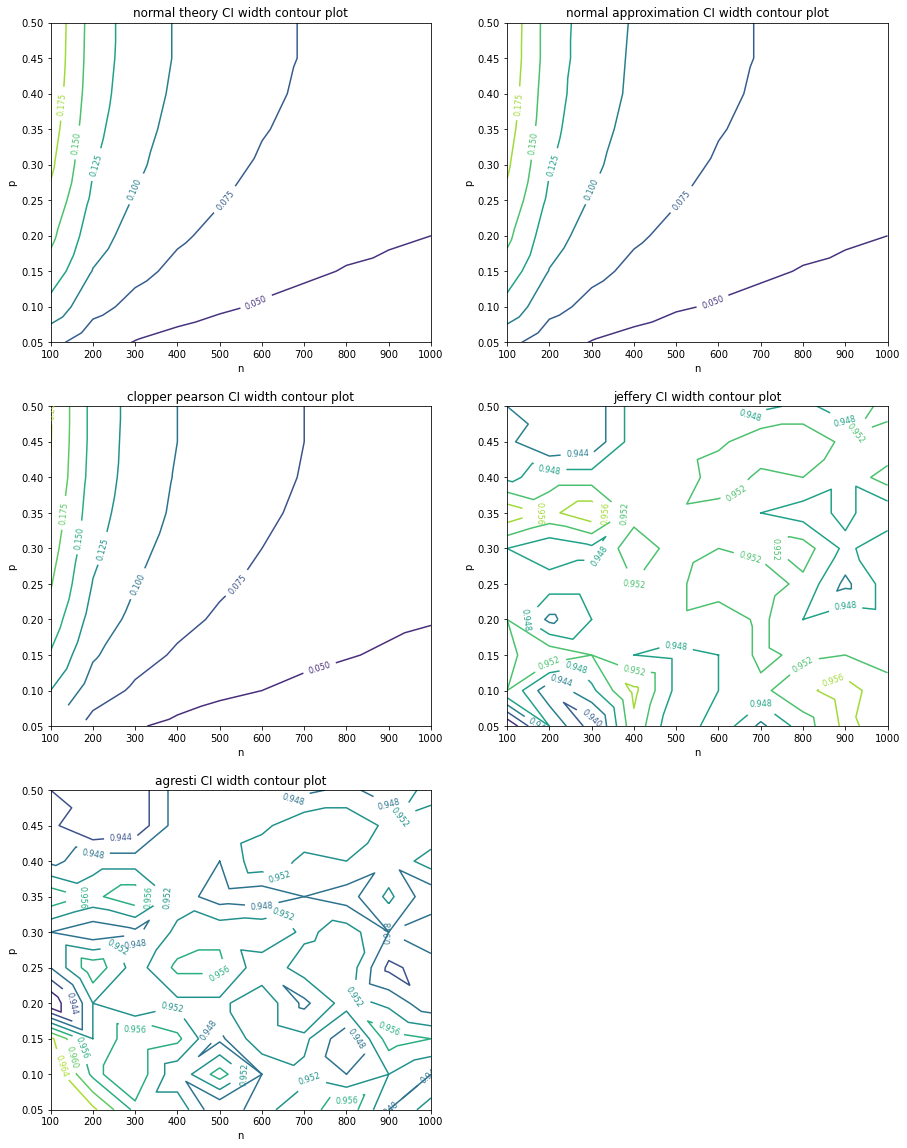

In [141]:
## (b) contour plots of confidence interval width

plt.rcParams['figure.figsize'] = (15, 20)

## northe 
ax_nort = northe_wid[:, 0]
ay_nort = northe_wid[:, 1]
az_nort = northe_wid[:, 2]
ax0 = plt.subplot(3, 2, 1)
cp = ax0.tricontour(ax_nort, ay_nort, az_nort)
ax0.clabel(cp, inline = True, fontsize = 8)
ax0.set_title('normal theory CI width contour plot')
ax0.set_xlabel('n')
ax0.set_ylabel('p')

## norappr
ax_nora = norappr_wid[:, 0]
ay_nora = norappr_wid[:, 1]
az_nora = norappr_wid[:, 2]
ax1 = plt.subplot(3, 2, 2)
cp = ax1.tricontour(ax_nora, ay_nora, az_nora)
ax1.clabel(cp, inline = True, fontsize = 8)
ax1.set_title('normal approximation CI width contour plot')
ax1.set_xlabel('n')
ax1.set_ylabel('p')

## clopear
ax_clo = clopear_wid[1:, 0]
ay_clo = clopear_wid[1:, 1]
az_clo = clopear_wid[1:, 2]
ax2 = plt.subplot(3, 2, 3)
cp = ax2.tricontour(ax_clo, ay_clo, az_clo)
ax2.clabel(cp, inline = True, fontsize = 8)
ax2.set_title('clopper pearson CI width contour plot')
ax2.set_xlabel('n')
ax2.set_ylabel('p')

## jef
ax_jef = jef_r[:, 0]# delete first values of loop
ay_jef = jef_r[:, 1]
az_jef = jef_r[:, 2]
ax3 = plt.subplot(3, 2, 4)
cp = ax3.tricontour(ax_jef, ay_jef, az_jef)
ax3.clabel(cp, inline = True, fontsize = 8)
ax3.set_title('jeffery CI width contour plot')
ax3.set_xlabel('n')
ax3.set_ylabel('p')

## Agr
ax_agr = agr_r[:, 0]
ay_agr = agr_r[:, 1]
az_agr = agr_r[:, 2]
ax4 = plt.subplot(3, 2, 5)
cp = ax4.tricontour(ax_agr, ay_agr, az_agr)
ax4.clabel(cp, inline = True, fontsize = 8)
ax4.set_title('agresti CI width contour plot')
ax4.set_xlabel('n')
ax4.set_ylabel('p')

plt.show()

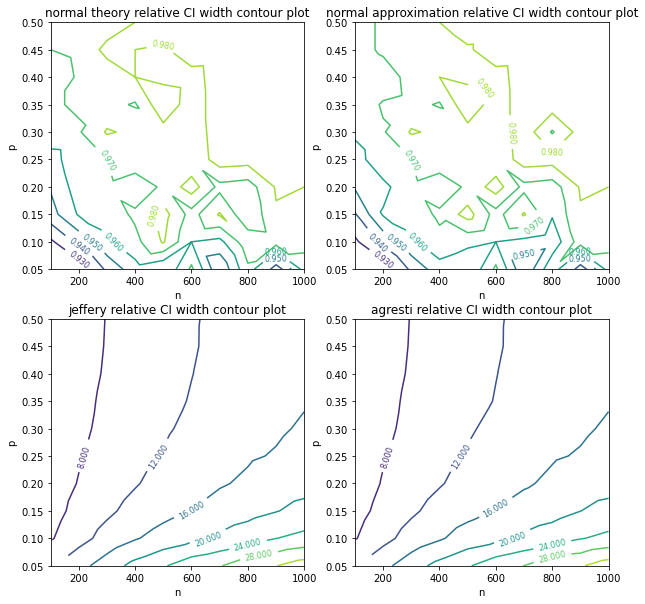

In [162]:
## contour plots of relative CI width, taking clopper pearson as reference

plt.rcParams['figure.figsize'] = (10, 10)

## northe 
rz_nort = np.array(['%.3f'%(i) for i in northe_wid[1:, 2] / clopear_wid[1:, 2]], dtype = 'float')
ax0 = plt.subplot(2, 2, 1)
cp = ax0.tricontour(ax_nort[1:], ay_nort[1:], rz_nort)
ax0.clabel(cp, inline = True, fontsize = 8)
ax0.set_title('normal theory relative CI width contour plot')
ax0.set_xlabel('n')
ax0.set_ylabel('p')

## norappr
rz_nora = np.array(['%.3f'%(i) for i in norappr_wid[1:, 2] / clopear_wid[1:, 2]], dtype = 'float')
ax1 = plt.subplot(2, 2, 2)
cp = ax1.tricontour(ax_nora[1:], ay_nora[1:], rz_nora)
ax1.clabel(cp, inline = True, fontsize = 8)
ax1.set_title('normal approximation relative CI width contour plot')
ax1.set_xlabel('n')
ax1.set_ylabel('p')


## jef
rz_jef =  np.array(['%.3f'%(i) for i in jef_r[1:, 2] / clopear_wid[1:, 2]], dtype = 'float')
ax3 = plt.subplot(2, 2, 3)
cp = ax3.tricontour(ax_jef[1:], ay_jef[1:], rz_jef)
ax3.clabel(cp, inline = True, fontsize = 8)
ax3.set_title('jeffery relative CI width contour plot')
ax3.set_xlabel('n')
ax3.set_ylabel('p')

## Agr
rz_agr = np.array(['%.3f'%(i) for i in agr_r[1:, 2] / clopear_wid[1:, 2]], dtype = 'float')
ax4 = plt.subplot(2, 2, 4)
cp = ax4.tricontour(ax_agr[1:], ay_agr[1:], rz_agr)
ax4.clabel(cp, inline = True, fontsize = 8)
ax4.set_title('agresti relative CI width contour plot')
ax4.set_xlabel('n')
ax4.set_ylabel('p')

plt.show()
